In [1]:
import pandas as pd
import numpy as np

сначала препроцессним данные

In [2]:
data = pd.read_csv('../data/singapore_airlines_reviews.csv')

In [3]:
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


дата публикации, устройство и количество helpful votes нам впринципе не интересны, а type тут только review, выкинем их, чтобы глаза не мазолили


In [4]:
data = data[['rating', 'text', 'title']]

In [5]:
data = data.dropna()

In [6]:
data.head()

,rating,text,title
0,3,We used this airline to go from Singapore to L...,Ok
1,5,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...
2,1,"Booked, paid and received email confirmation f...",Don’t give them your money
3,5,"Best airline in the world, seats, food, servic...",Best Airline in the World
4,2,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...


Сразу подрежу несколько ревью для медиума, чтобы самому не придумывать

In [7]:
reviews_for_medium = data.iloc[:5]

In [8]:
data = data.iloc[5:]

In [9]:
data.shape

(9994, 3)

Easy
Выбрать метрику.

Удалить пунктуацию из датасета.

Преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

In [10]:
import seaborn as sns

<Axes: xlabel='rating', ylabel='Count'>

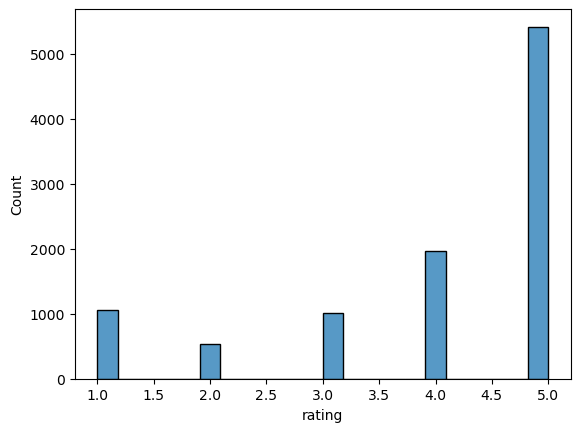

In [11]:
sns.histplot(
    data,
    x='rating'
)


дисбаланс классов сильный, возьмем f1, а обучать будем логрег.

In [12]:
import re

с помощью регулярочек выкинем знаки препинания и переносы строки

In [13]:
data.head()

,rating,text,title
5,1,We booked our flights a full 9 months in advan...,Impossible to get a promised refund
6,5,This was a fascinating experience. As I sat in...,WOAH. FLY WITH SQ
7,1,Very bad expeirence for flight check in at bai...,Long Q to check in
8,1,"Respected Faculty, I am Bincy, writing this t...","Very bad, disappointed"
9,1,I would rate Singapore airlines the worse I ha...,Give Singapore airlines a miss.


In [14]:
def preprocess(text):
    text = text = re.sub(r'[^\w\s]', '', text.lower())
    text = text = re.sub(r'\n', ' ', text.lower())
    return text

In [15]:
data['text'] = data['text'].apply(preprocess)
data['title'] = data['title'].apply(preprocess)

In [16]:
data['text'] = data['title'] + '. ' + data['text']
data = data[['rating', 'text']] 

In [17]:
data.head()

,rating,text
5,1,impossible to get a promised refund. we booked...
6,5,woah fly with sq. this was a fascinating exper...
7,1,long q to check in. very bad expeirence for fl...
8,1,very bad disappointed. respected faculty i am ...
9,1,give singapore airlines a miss. i would rate s...


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['rating'], random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/home/timur/.conda/envs/my-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
f1_score(y_pred, y_test, average='micro')

0.6914765906362546

Normal
Удалить стоп-слова, применить стемминг/лемматизацию. Обучить несколько моделей, подобрать параметры, сделать выводы.

Написать самостоятельно два отзыва - один положительный, один негативный, посмотреть, угадает ли модель.

Стоп слова и лемматизацию возьмем из spacy, крутая либа!

In [22]:
import spacy

In [23]:
nlp = spacy.load("en_core_web_sm")

In [24]:
def process(text):
    global nlp
    text = text = re.sub(r'[^\w\s]', '', text.lower())
    text = text = re.sub(r'\n', ' ', text.lower())
    doc = nlp(text)
    tokens = []
    for token in doc:
        if not token.is_stop:
            tokens.append(token.lemma_)
    return ' '.join(tokens)

In [25]:
data['text'] = data['text'].apply(process)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['rating'])

In [27]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [28]:
clf = LogisticRegression()

clf.fit(X_train, y_train)


/home/timur/.conda/envs/my-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)
f1_score(y_pred, y_test, average='micro')

0.6886754701880752

In [31]:
reviews_for_medium['text'] = reviews_for_medium['title'] + '. ' + reviews_for_medium['text']
reviews_for_medium = reviews_for_medium[['rating', 'text']]

In [32]:
reviews_for_medium['text'] = reviews_for_medium['text'].apply(process)

In [33]:
ratings = reviews_for_medium['rating']
texts = reviews_for_medium['text']

In [35]:
texts = vectorizer.transform(texts)

In [36]:
clf.predict(texts)

array([4, 5, 1, 5, 2])

In [37]:
ratings

0    3
1    5
2    1
3    5
4    2
Name: rating, dtype: int64

Даже хорошо угадывает!